# 03. Naver Movie Ranking

## 1. 네이버 영화 평점 사이트 분석
- https://movie.naver.com/
- 영화랭킹 탭 이동
- 영화랭킹에서 평점순(현재상영영화) 선택

~~~
https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20230207
~~~

- 웹 페이지 주소에는 많은 정보가 담겨있습니다.
- 원하는 정보를 얻기 위해서 변화시켜줘야 하는 주소의 규칙을 찾을 수 있습니다.
- 여기에서는 날짜 정보를 변경해주면 해당 페이지에 접근이 가능하다.

In [4]:
# requirments

import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [6]:
url = "https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20230207"
response = urlopen(url)
# response.status
soup = BeautifulSoup(response,"html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html lang="ko">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
   <meta content="네이버영화 " property="me2:post_tag">
    <meta content="네이버영화" property="me2:category1"/>
    <meta content="" property="me2:category2"/>
    <meta content="랭킹 : 네이버 영화" property="og:title"/>
    <meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
    <meta content="article" property="og:type"/>
    <meta content="https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&amp;date=20230207" property="og:url"/>
    <meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/>
    <!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
    <meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
    <me

In [7]:
# 영화 제목 태그
soup.find_all("div","tit5")

[<div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=223800" title="더 퍼스트 슬램덩크">더 퍼스트 슬램덩크</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=222301" title="올빼미">올빼미</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=213733" title="극장판 주술회전 0">극장판 주술회전 0</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=201073" title="코다">코다</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=19031" title="러브레터">러브레터</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=209280" title="탄생">탄생</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=96379" title="비긴 어게인">비긴 어게인</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=184509" title="영웅">영웅</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=172425" title="서치">서치</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=215466" title="장화신은 고양이: 끝내주는 모험">장화신은 고양

In [8]:
# 1
soup.find_all("div","tit5")[0].a.string

'더 퍼스트 슬램덩크'

In [9]:
# 2
soup.select(".tit5")[0].find("a").text

'더 퍼스트 슬램덩크'

In [11]:
# 3
soup.select(".tit5")[0].select_one("a").get_text()

'더 퍼스트 슬램덩크'

In [12]:
# 영화 평점 태그
soup.find_all("td","point")

# soup.select(".point")

[<td class="point">9.48</td>,
 <td class="point">9.31</td>,
 <td class="point">9.21</td>,
 <td class="point">9.14</td>,
 <td class="point">9.14</td>,
 <td class="point">9.08</td>,
 <td class="point">9.04</td>,
 <td class="point">9.00</td>,
 <td class="point">8.93</td>,
 <td class="point">8.87</td>,
 <td class="point">8.81</td>,
 <td class="point">8.76</td>,
 <td class="point">8.65</td>,
 <td class="point">8.64</td>,
 <td class="point">8.64</td>,
 <td class="point">8.63</td>,
 <td class="point">8.56</td>,
 <td class="point">8.42</td>,
 <td class="point">8.41</td>,
 <td class="point">8.39</td>,
 <td class="point">8.22</td>,
 <td class="point">8.20</td>,
 <td class="point">8.17</td>,
 <td class="point">8.12</td>,
 <td class="point">8.07</td>,
 <td class="point">7.97</td>,
 <td class="point">7.97</td>,
 <td class="point">7.94</td>,
 <td class="point">7.89</td>,
 <td class="point">7.78</td>,
 <td class="point">7.37</td>,
 <td class="point">6.95</td>,
 <td class="point">6.81</td>,
 <td class

In [14]:
len(soup.find_all("td","point")), len(soup.find_all("div","tit5"))

(34, 34)

In [15]:
soup.find_all("td",class_="point")[0].text

'9.48'

In [17]:
# 영화제목 리스트

end = len(soup.find_all("td","point"))

movie_name = []

for n in range(0, end):
    movie_name.append(
        soup.find_all("div","tit5")[n].a.string
    )
movie_name

['더 퍼스트 슬램덩크',
 '올빼미',
 '극장판 주술회전 0',
 '코다',
 '러브레터',
 '탄생',
 '비긴 어게인',
 '영웅',
 '서치',
 '장화신은 고양이: 끝내주는 모험',
 '너의 이름은.',
 '여름날 우리',
 '아바타: 물의 길',
 '오늘 밤, 세계에서 이 사랑이 사라진다 해도',
 '헤어질 결심',
 '라라랜드',
 '양자경의 더 모든 날 모든 순간',
 '드라이브 마이 카',
 '스위치',
 '상견니',
 '거북이는 의외로 빨리 헤엄친다',
 '애프터 양',
 '언어의 정원',
 '릴리 슈슈의 모든 것',
 '본즈 앤 올',
 '날씨의 아이',
 '라일 라일 크로커다일',
 '3000년의 기다림',
 '별을 쫓는 아이',
 '바빌론',
 '메간',
 '유령',
 '원피스 필름 레드',
 '교섭']

In [19]:
movie_name = [soup.select(".tit5")[n].a.text for n in range(0, end)]
movie_name

['더 퍼스트 슬램덩크',
 '올빼미',
 '극장판 주술회전 0',
 '코다',
 '러브레터',
 '탄생',
 '비긴 어게인',
 '영웅',
 '서치',
 '장화신은 고양이: 끝내주는 모험',
 '너의 이름은.',
 '여름날 우리',
 '아바타: 물의 길',
 '오늘 밤, 세계에서 이 사랑이 사라진다 해도',
 '헤어질 결심',
 '라라랜드',
 '양자경의 더 모든 날 모든 순간',
 '드라이브 마이 카',
 '스위치',
 '상견니',
 '거북이는 의외로 빨리 헤엄친다',
 '애프터 양',
 '언어의 정원',
 '릴리 슈슈의 모든 것',
 '본즈 앤 올',
 '날씨의 아이',
 '라일 라일 크로커다일',
 '3000년의 기다림',
 '별을 쫓는 아이',
 '바빌론',
 '메간',
 '유령',
 '원피스 필름 레드',
 '교섭']

In [21]:
# 영화평점 리스트
end = len(soup.find_all("td","point"))

movie_point = [soup.find_all("td","point")[n].string for n in range(0, end)]
movie_point

['9.48',
 '9.31',
 '9.21',
 '9.14',
 '9.14',
 '9.08',
 '9.04',
 '9.00',
 '8.93',
 '8.87',
 '8.81',
 '8.76',
 '8.65',
 '8.64',
 '8.64',
 '8.63',
 '8.56',
 '8.42',
 '8.41',
 '8.39',
 '8.22',
 '8.20',
 '8.17',
 '8.12',
 '8.07',
 '7.97',
 '7.97',
 '7.94',
 '7.89',
 '7.78',
 '7.37',
 '6.95',
 '6.81',
 '6.10']

In [22]:
# 전체 데이터 수 확인

len(movie_name), len(movie_point)

(34, 34)

## 2. 자동화를 위한 코드

~~~
"https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20230207"
~~~
- 날짜만 변경하면 우리가 원하는 기간 만큼 데이터를 얻을 수 있다.

In [25]:
date = pd.date_range("2021.01.01", periods=100,freq="D")
date

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-14', '2021-01-15', '2021-01-16',
               '2021-01-17', '2021-01-18', '2021-01-19', '2021-01-20',
               '2021-01-21', '2021-01-22', '2021-01-23', '2021-01-24',
               '2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28',
               '2021-01-29', '2021-01-30', '2021-01-31', '2021-02-01',
               '2021-02-02', '2021-02-03', '2021-02-04', '2021-02-05',
               '2021-02-06', '2021-02-07', '2021-02-08', '2021-02-09',
               '2021-02-10', '2021-02-11', '2021-02-12', '2021-02-13',
               '2021-02-14', '2021-02-15', '2021-02-16', '2021-02-17',
               '2021-02-18', '2021-02-19', '2021-02-20', '2021-02-21',
               '2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25',
      

In [26]:
date[0]

Timestamp('2021-01-01 00:00:00', freq='D')

In [27]:
date[0].strftime("%Y-%m-%d")

'2021-01-01'

In [33]:
# 문자열 format

test_string = "Hi, I'm {name}"
test_string.format(name="Zerobase")

"Hi, I'm Zerobase"

In [40]:
import time
from tqdm import tqdm

movie_date = []
movie_name = []
movie_point = []

for today in tqdm(date):
    url = "https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date={date}"
    response = urlopen(url.format(date=today.strftime("%Y%m%d")))
    soup = BeautifulSoup(response, "html.parser")
    
    end = len(soup.find_all("td","point"))
    
    movie_date.extend([today for _ in range(0, end)])
    movie_name.extend([soup.find_all("div","tit5")[n].a.get_text() for n in range(0, end)])
    movie_point.extend([soup.find_all("td","point")[n].string for n in range(0, end)])
    
    time.sleep(0.5)

100%|██████████| 100/100 [01:28<00:00,  1.13it/s]


In [41]:
len(movie_date), len(movie_name), len(movie_point)

(4793, 4793, 4793)

In [42]:
movie_point[:5]

['9.59', '9.52', '9.49', '9.40', '9.39']

In [43]:
movie_name[:5]

['가나의 혼인잔치: 언약', '언플랜드', '극장판 바이올렛 에버가든', '부활: 그 증거', '소년시절의 너']

In [44]:
movie = pd.DataFrame({
    "date" : movie_date,
    "name" : movie_name,
    "point": movie_point
})
movie.tail()

,date,name,point
4788,2021-04-10,두번째 사랑,8.00
4789,2021-04-10,날씨의 아이,7.95
4790,2021-04-10,밀양,7.92
4791,2021-04-10,별을 쫓는 아이,7.91
4792,2021-04-10,너는 여기에 없었다,7.82


In [45]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4793 entries, 0 to 4792
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4793 non-null   datetime64[ns]
 1   name    4793 non-null   object        
 2   point   4793 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 112.5+ KB


In [48]:
movie["point"] = movie["point"].astype(float)
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4793 entries, 0 to 4792
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4793 non-null   datetime64[ns]
 1   name    4793 non-null   object        
 2   point   4793 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 112.5+ KB


In [49]:
# 데이터 저장

movie.to_csv(
    "../data/03. naver_movie_data.csv",sep=",",encoding="utf-8"
)

In [50]:
df = pd.read_csv("../data/03. naver_movie_data.csv")
df

,Unnamed: 0,date,name,point
0,0,2021-01-01,가나의 혼인잔치: 언약,9.59
1,1,2021-01-01,언플랜드,9.52
2,2,2021-01-01,극장판 바이올렛 에버가든,9.49
3,3,2021-01-01,부활: 그 증거,9.40
4,4,2021-01-01,소년시절의 너,9.39
...,...,...,...,...
4788,4788,2021-04-10,두번째 사랑,8.00
4789,4789,2021-04-10,날씨의 아이,7.95
4790,4790,2021-04-10,밀양,7.92
4791,4791,2021-04-10,별을 쫓는 아이,7.91


In [52]:
# 컬럼 하나가 더 출력되는 것을 방지하기 위해 index_col=0을 해준다
df = pd.read_csv("../data/03. naver_movie_data.csv", index_col=0)
df

,date,name,point
0,2021-01-01,가나의 혼인잔치: 언약,9.59
1,2021-01-01,언플랜드,9.52
2,2021-01-01,극장판 바이올렛 에버가든,9.49
3,2021-01-01,부활: 그 증거,9.40
4,2021-01-01,소년시절의 너,9.39
...,...,...,...
4788,2021-04-10,두번째 사랑,8.00
4789,2021-04-10,날씨의 아이,7.95
4790,2021-04-10,밀양,7.92
4791,2021-04-10,별을 쫓는 아이,7.91


## 3. 영화 평점 데이터 정리

In [53]:
import numpy as np
import pandas as pd

In [54]:
movie = pd.read_csv("../data/03. naver_movie_data.csv", index_col=0)
movie.tail()

,date,name,point
4788,2021-04-10,두번째 사랑,8.00
4789,2021-04-10,날씨의 아이,7.95
4790,2021-04-10,밀양,7.92
4791,2021-04-10,별을 쫓는 아이,7.91
4792,2021-04-10,너는 여기에 없었다,7.82


- 영화 이름으로 인덱스를 잡습니다.
- 점수의 합산을 구합니다.
- 100일 간 네이버 영화 평점 합산 기준 베스트&워스트 10 선정

In [56]:
# pivot table

movie_unique = pd.pivot_table(data=movie, index="name", aggfunc=np.sum)
movie_unique

/var/folders/v9/r_sm5t7x2t5gc1b5ry34_lj80000gn/T/ipykernel_79846/385042274.py:3: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  movie_unique = pd.pivot_table(data=movie, index="name", aggfunc=np.sum)


,point
name,
120BPM,2.76
1917,62.09
800,25.27
가나의 혼인잔치: 언약,501.68
건축학개론,78.03
...,...
해피 투게더,703.29
허트 로커,219.32
현기증,198.56


In [57]:
movie_best = movie_unique.sort_values(by="point",ascending=False) # 내림차순
movie_best.head()

,point
name,
너의 췌장을 먹고 싶어,959.59
극장판 바이올렛 에버가든,949.98
부활: 그 증거,936.44
러브 액츄얼리,893.02
화양연화,877.12


In [62]:

tmp = movie.query("name ==['화양연화']")
tmp

,date,name,point
22,2021-01-01,화양연화,8.80
70,2021-01-02,화양연화,8.79
117,2021-01-03,화양연화,8.75
162,2021-01-04,화양연화,8.76
205,2021-01-05,화양연화,8.76
...,...,...,...
4571,2021-04-06,화양연화,8.79
4621,2021-04-07,화양연화,8.79
4668,2021-04-08,화양연화,8.79
4719,2021-04-09,화양연화,8.79


In [60]:
# 시각화

import matplotlib.pyplot as plt
from matplotlib import rc

rc("font", family="Arial Unicode MS")
%matplotlib inline

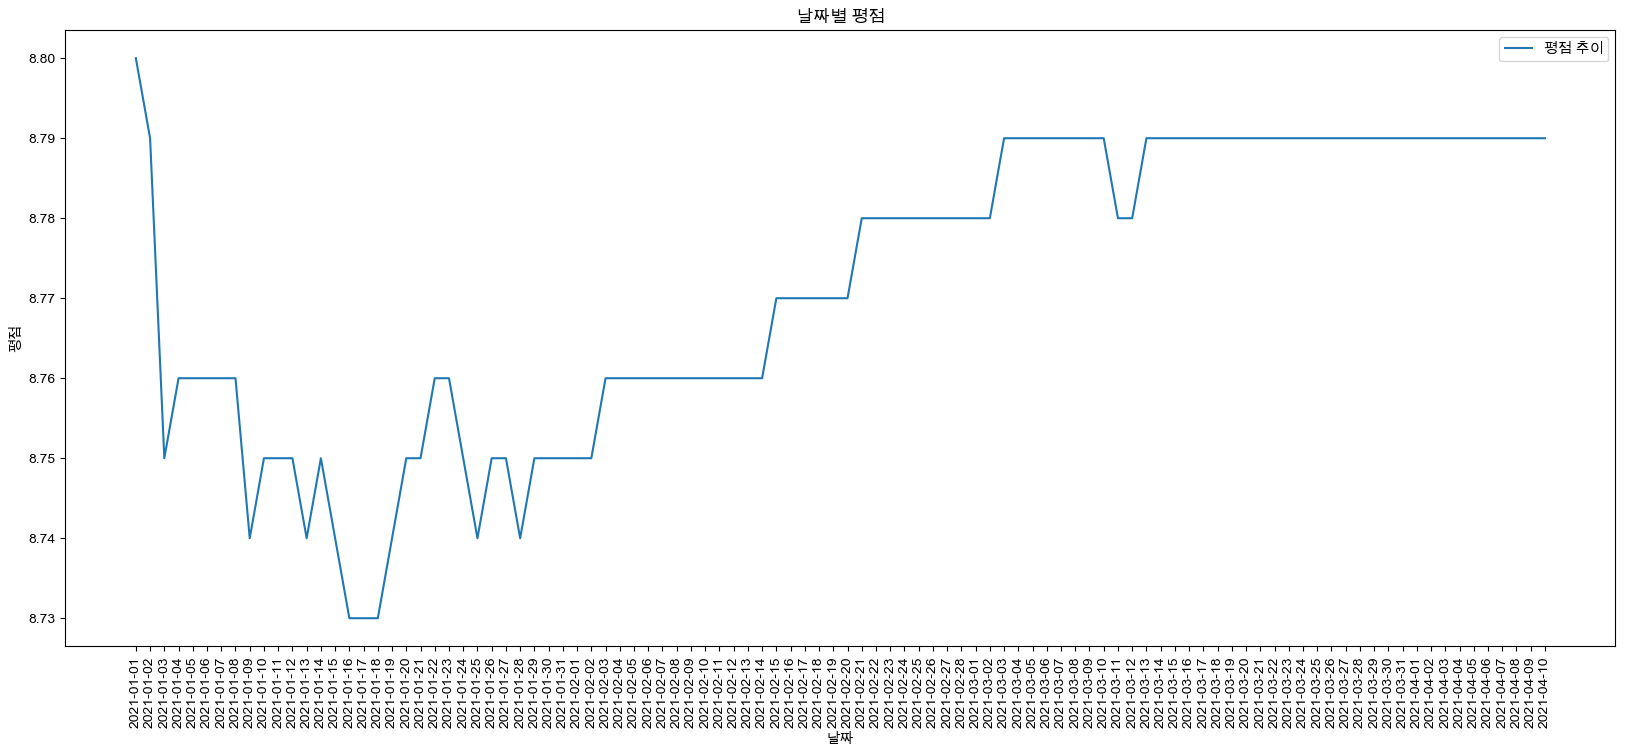

In [65]:
plt.figure(figsize=(20,8)) # x=20, y=8
plt.plot(tmp["date"], tmp["point"]) 
# 선 그대로 x축 날짜, y축 평점 => 날짜에 따른 평점 변화를 선그래프로 표현(시계열)
plt.title("날짜별 평점")
plt.xlabel("날짜")
plt.ylabel("평점")
plt.xticks(rotation="vertical")
plt.legend(labels=["평점 추이"],loc="best")
plt.show()

In [66]:
# 상위 10개 영화
movie_best.head(10)

,point
name,
너의 췌장을 먹고 싶어,959.59
극장판 바이올렛 에버가든,949.98
부활: 그 증거,936.44
러브 액츄얼리,893.02
화양연화,877.12
타오르는 여인의 초상,833.51
너의 이름은.,817.40
아비정전,814.83
찬실이는 복도 많지,785.58


In [67]:
movie_best.tail(10)

,point
name,
최악의 하루,23.40
열혈남아,23.16
영웅본색,18.36
너는 여기에 없었다,15.64
협상,14.64
고질라,13.34
초미의 관심사,7.37
레이니 데이 인 뉴욕,5.54
신 고질라,4.97


In [68]:
movie_pivot = pd.pivot_table(data=movie, index="date",columns="name",values="point")
movie_pivot.head()

name,120BPM,1917,800,가나의 혼인잔치: 언약,건축학개론,고질라,고질라 VS. 콩,국가부도의 날,굿바이,귀여운 여인,...,피아노,피아니스트의 전설,하나와 앨리스,해리 포터와 불의 잔,해리가 샐리를 만났을 때,해피 투게더,허트 로커,현기증,협상,화양연화
date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,NaN,NaN,3.60,9.59,NaN,NaN,NaN,NaN,9.04,8.7,...,8.66,NaN,8.11,NaN,8.89,NaN,NaN,NaN,NaN,8.80
2021-01-02,NaN,NaN,3.60,9.56,NaN,NaN,NaN,NaN,9.04,8.7,...,8.66,NaN,8.11,NaN,8.89,NaN,NaN,NaN,NaN,8.79
2021-01-03,NaN,NaN,3.60,9.54,NaN,NaN,NaN,NaN,9.04,8.7,...,8.66,NaN,8.11,NaN,8.88,NaN,NaN,NaN,NaN,8.75
2021-01-04,NaN,NaN,3.61,9.51,NaN,NaN,NaN,NaN,9.04,8.7,...,NaN,NaN,8.11,NaN,8.88,NaN,NaN,NaN,NaN,8.76
2021-01-05,NaN,NaN,3.62,9.52,NaN,NaN,NaN,NaN,9.04,NaN,...,NaN,NaN,NaN,NaN,8.88,NaN,NaN,NaN,NaN,8.76


In [70]:
movie_pivot.to_excel("../data/03. movie_pivot.xlsx")

In [71]:
import platform
import seaborn as sns
from matplotlib import font_manager, rc

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("Unknown system. sorry")

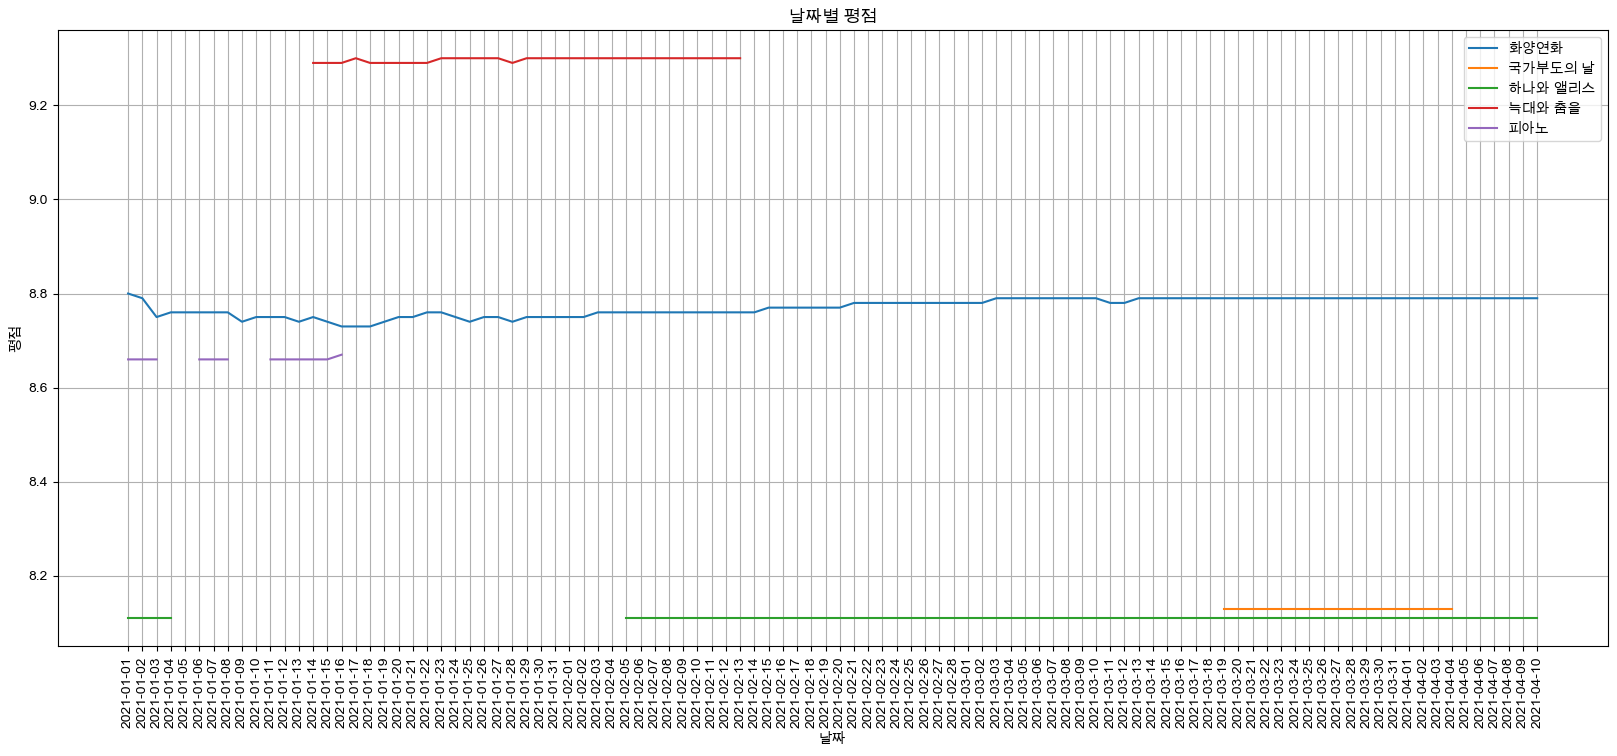

In [73]:
target_col = ["화양연화","국가부도의 날","하나와 앨리스","늑대와 춤을","피아노"]
plt.figure(figsize=(20,8))
plt.title("날짜별 평점")
plt.xlabel("날짜")
plt.ylabel("평점")
plt.xticks(rotation="vertical")
plt.tick_params(bottom="off",labelbottom="off")
plt.plot(movie_pivot[target_col])
plt.legend(target_col, loc="best")
plt.grid(True)